# 感知机


# 导包和定义激活函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt #用于绘图
import pandas as pd
from sklearn.model_selection import train_test_split # 划分训练集和测试集
np.set_printoptions(formatter={'float':'{:.1f}'.format})#让np显示小数点后的0

In [2]:
# 定义阶跃函数   
def step(y):   
    return 1 if y > 0 else 0  
# 定义符号函数
def sign(a):
    if a>0:
        return 1
    else:
        return -1

# 1.课本案例

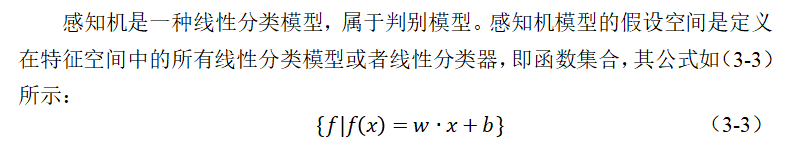

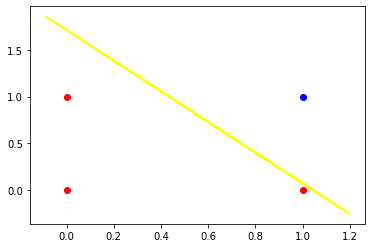

In [3]:
# 定义输入输出数据和误差e
x = np.array([[0,0], [0,1], [1,0], [1,1]])   #初始数据
d = [0,0,0,1]   #真值
e = 0
# 初始化参数：权值w1，w2、阈值c、学习速率a，b
w = np.array([0.038, 0.044]) # 输入层至输出层连接的权值
c = 0.042  #阈值
a = 0.015  #学习速率
b = 0.006  #学习速率

while True:  # 无限循环，碰到break停止循环
    num_errors = 0
    for i in range(len(x)):
        # 求加权和
        s = np.sum( w * x[i]) + c #目标值与阈值的差
#         print(s)
        y = step(s)
#         print(y)
        e = d[i] - y  #误差
            # 更新权值和阈值
        w = w + a * e * x[i]
#         print(w)
        c = np.sum(c+b*e)
#         print(c)
# 判断是否符合所期望的误差条件，这里期望的误差是0 
        if(e!=0):
            num_errors+=1
# 当一轮for循环误差全为0时，跳出循环
    if(num_errors==0):
        break
# 指定x轴数据在-0.1~1.2均匀分布
x=np.random.uniform(-0.1,1.2,100)
y=-(w[0]*x+c)/w[1]
# 绘出绿色的分界线
plt.plot(x,y,'yellow')
# 绘出训练集中的点  
plt.scatter(0,0,c='r')
plt.scatter(0,1,c='r')
plt.scatter(1,0,c='r')
plt.scatter(1,1,c='b')
plt.show()

# 2. 利用感知机模型对鸢尾花进行分类
导入数据

In [4]:
flower_title = ['ep_len', 'ep_wid', 'hb_len', 'hb_wid', 'f_class']
flower = pd.read_csv('./iris.data', header=None, names=flower_title, engine = 'python')
flower.head()

,ep_len,ep_wid,hb_len,hb_wid,f_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 数据属性说明  
属性信息：

1.萼片长度（以厘米计）  
2.萼片宽度（以厘米计）  
3.花瓣长度（以厘米计）  
4.花瓣宽度（以厘米计）  
5.类别：  
-艾里斯·塞托萨（Iris Setosa） -艾里斯（Iris Versicolour）–艾里斯·维珍妮卡 （Iris Virginica）  
6.数据集规格：150*5



# 将种类转为数字
方便进行判断和处理

这里犯了一个逻辑错误，由于阶跃函数输出为0，1，而原始数据集修正为0，1，初始权重也为0，0，导致后面计算误差时e一直为0，使权重得不到修正，因此转为使用sign()函数，并将真值修改为-1，1

In [5]:
# class2int={ 'Iris-setosa': 2, 'Iris-versicolor': 0,'Iris-virginica': 1}#转换字典   
class2int={ 'Iris-setosa': 0, 'Iris-versicolor': -1,'Iris-virginica': 1}
# flower.f_class.replace(class2int)
flower['f_class']=flower['f_class'].map(class2int)
# flower.loc[(flower['f_class']=='Iris-versicolor'),'Iris-versicolor']=0
flower


,ep_len,ep_wid,hb_len,hb_wid,f_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# 为了绘图方便和适应感知机算法，去花瓣长度和宽度为特征，取类别为结果,对比数据后，取后两类进行分类
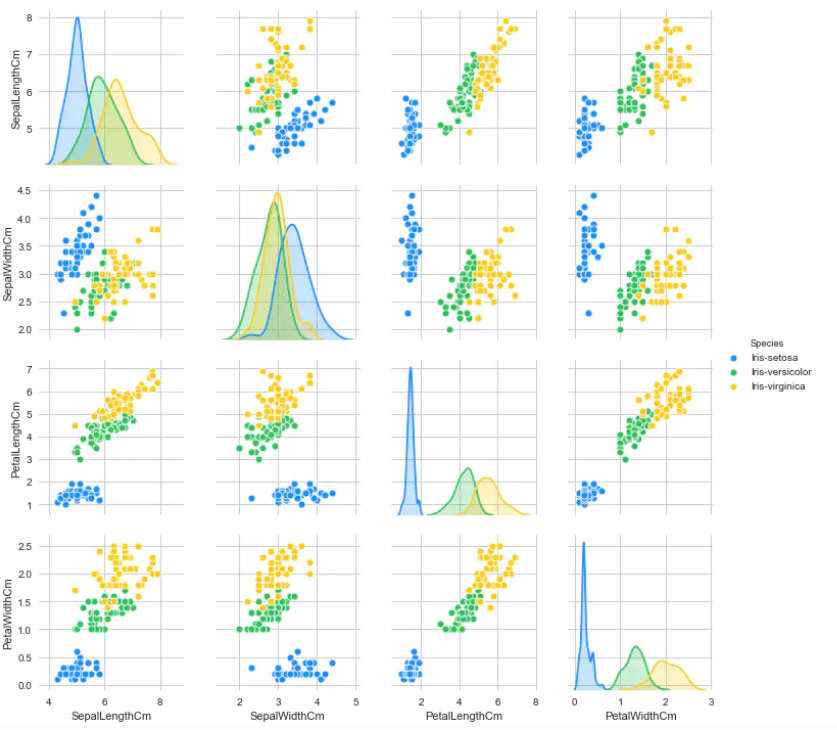

In [6]:
col=['hb_len','hb_wid','f_class']
# Iris1=pd.DataFrame(flower[0:50],columns = col)
# Iris2=pd.DataFrame(flower[100:],columns = col)
# Iris=pd.concat([Iris1,Iris2])
Iris=pd.DataFrame(flower[50:],columns = col)
Iris_1=Iris.values #数据格式转换 取值
Iris_1 

array([[4.7, 1.4, -1.0],
       [4.5, 1.5, -1.0],
       [4.9, 1.5, -1.0],
       [4.0, 1.3, -1.0],
       [4.6, 1.5, -1.0],
       [4.5, 1.3, -1.0],
       [4.7, 1.6, -1.0],
       [3.3, 1.0, -1.0],
       [4.6, 1.3, -1.0],
       [3.9, 1.4, -1.0],
       [3.5, 1.0, -1.0],
       [4.2, 1.5, -1.0],
       [4.0, 1.0, -1.0],
       [4.7, 1.4, -1.0],
       [3.6, 1.3, -1.0],
       [4.4, 1.4, -1.0],
       [4.5, 1.5, -1.0],
       [4.1, 1.0, -1.0],
       [4.5, 1.5, -1.0],
       [3.9, 1.1, -1.0],
       [4.8, 1.8, -1.0],
       [4.0, 1.3, -1.0],
       [4.9, 1.5, -1.0],
       [4.7, 1.2, -1.0],
       [4.3, 1.3, -1.0],
       [4.4, 1.4, -1.0],
       [4.8, 1.4, -1.0],
       [5.0, 1.7, -1.0],
       [4.5, 1.5, -1.0],
       [3.5, 1.0, -1.0],
       [3.8, 1.1, -1.0],
       [3.7, 1.0, -1.0],
       [3.9, 1.2, -1.0],
       [5.1, 1.6, -1.0],
       [4.5, 1.5, -1.0],
       [4.5, 1.6, -1.0],
       [4.7, 1.5, -1.0],
       [4.4, 1.3, -1.0],
       [4.1, 1.3, -1.0],
       [4.0, 1.3, -1.0],


# 划分训练集和测试集

In [7]:
train, test = train_test_split(Iris_1,test_size=0.2) # 按照4：1划分训练集和测试集

In [8]:
# train

In [9]:
test

array([[3.8, 1.1, -1.0],
       [5.7, 2.5, 1.0],
       [4.6, 1.5, -1.0],
       [4.8, 1.8, -1.0],
       [6.1, 2.5, 1.0],
       [4.7, 1.6, -1.0],
       [5.4, 2.3, 1.0],
       [4.0, 1.0, -1.0],
       [4.9, 1.5, -1.0],
       [5.1, 2.0, 1.0],
       [6.3, 1.8, 1.0],
       [5.6, 2.2, 1.0],
       [3.3, 1.0, -1.0],
       [6.6, 2.1, 1.0],
       [4.4, 1.3, -1.0],
       [6.4, 2.0, 1.0],
       [4.9, 1.8, 1.0],
       [4.5, 1.7, 1.0],
       [5.6, 2.4, 1.0],
       [4.5, 1.5, -1.0]])

In [10]:
x=test[0][:-1] # :-1表示取到倒数第二个
x

array([3.8, 1.1])

In [11]:
y=test[0][-1:] # -1: 表示取倒数第一个
y

array([-1.0])

# 绘制训练集图

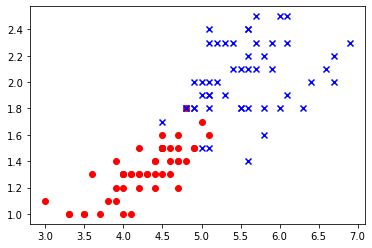

In [12]:
for i in range(len(Iris_1)):
    if Iris_1[i][2] == -1:
        plt.scatter(Iris_1[i][0],Iris_1[i][1],c='r',marker='o')
    else:
        plt.scatter(Iris_1[i][0],Iris_1[i][1],c='b',marker='x')

# 这里经过多次失败后，调整了学习率的大小，使lr2>lr1 ,个人猜想原因在于鸢尾花原始数据中，花瓣长度>宽度，因此使宽度的权重增大
后来根据公式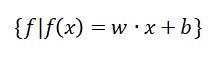，修改了权重更新的方法，得到了正确的图像  


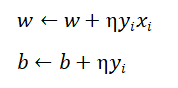

In [13]:
def feeling():
#     w = np.array([0.038, 0.044]) # 初始权重设为【0，0】
    w = np.zeros(2)
#     print(w)
    lr_1=0.015 #learning rate
    lr_2=0.015
    c=0 # 阈值
    # 循环遍历计数
    cnt=0
    while True:
        cnt += 1
#         遍历次数超过100时跳出循环，学习结束
        if cnt > 100:
            break
        for i in range(len(train)):
            x = np.array(train[i][:-1])
            y = train[i][-1]
            s = np.sum(w*x)+c #计算值与阈值的差
            z = sign(s)
            # 感知器的学习算法是以错误驱动的，当分错一个样本时，就用这个样本来更新权重。
            if y * z <= 0:
#                 e = y-z  # 误差
#                 w = w+lr_1*e*x # 更新权重
#                 c = np.sum(c+lr_2*e) # 更新阈值
                w = w + lr_1 * y * x
                c = c + lr_2 * y
    return cnt ,w ,c

# 绘图并计算准确率

迭代次数： 101
超平面法向量： [0.1 0.6]
阈值： -1.6799999999999964


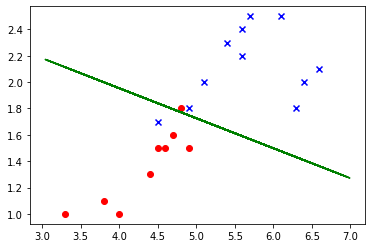

精确率： 0.9


In [14]:
if __name__=='__main__':
    cnt,w,c = feeling()
    print("迭代次数：",cnt)
    print("超平面法向量：",w)
    print("阈值：",c)
    count = 0
    for i in range(len(test)):
        target = test[i][-1:]
    #     print(target)
        result = sign(np.sum(w*test[i][:-1])+c)
    #     print(result)
        if (target == result):
            count += 1
    accuracy = float(count/len(test))
    # 绘制点
    for i in range(len(test)):
        if test[i][2] == -1:
            plt.scatter(test[i][0],test[i][1],c='r',marker='o')
        else:
            plt.scatter(test[i][0],test[i][1],c='b',marker='x')
    X = np.random.uniform(3,7,100)
    Y = -(w[0]*X+c)/w[1]
    #     Y = np.random.uniform(-0.1,0.5,1)
    # 绘制分割线
    plt.plot(X,Y,'g')
    plt.show()
    print("精确率：",accuracy)

# 3.使用口袋算法对其进行优化
   原始的感知机算法只能够对于线性可分的问题进行处理，而在处理线性不可分的问题时，则会发生算法无法停止的震荡现象。在实际工作中许多学者设计出各种规则使算法终止（例如设置最大迭代次数、学习步长骤减等），但是最终解的性质是不确定的。  
   为了应对这些问题，Gallant在感知机算法的迭代过程中引入一个口袋权向量来存放正确运行次数最多的感知机权向量，其目标是找到一个最优解，并称这一感知机的改进算法为口袋算法(Pocket Algorithm)。在口袋算法中，需要遵循两条规则：  
   （1）样本必须随机选取  
   （2）需要进行一些检查以防结果劣化  
###  口袋算法在处理过程中采用了贪心的近似处理，添加了一个用于存放正确运行次数最多的感知机权重与阈值的口袋权向量W，若在一次训练中得到的结果较W更好，则用取代W，否则保留W。其中，采用口袋算法的感知机模型在处理含有噪声的数据中表现很好。

In [15]:
def checkErrorRate(train,w,c):
    count=0
    for i in range(len(train)):
        x=np.array(train[i][:-1])
        y=train[i][-1]
        if np.sign(np.sum(w*x)+c)!=np.sign(y):
            count+=1
    return count/len(train)

In [16]:
def Pocket():
    w = np.zeros(2)
    lr = 0.015
    c = 0
    best_w = w
    bestRate = 1
    best_c = c
#     循环遍历计数
    cnt = 0
    while True:
        cnt += 1
#         遍历次数超过500时跳出循环，学习结束
        if cnt > 500:
            break
        for i in range(len(train)):
            x = np.array(train[i][:-1])
            y = train[i][-1]
            
            s = np.sum(w*x)-c
            z = sign(s)
            if y*z <= 0:
                w = w + lr * y * x
                c = c + lr * y
                
#                 e = y-z
#                 w = w+lr*e*x
#                 c = np.sum(c+lr*e)
                rate = checkErrorRate(train,w,c) # 如果在一次训练中，错误率降低，就用这次的w和c进行更新
                if rate<bestRate:
                    bestRate = rate
                    best_w = w
                    best_c = c
    return cnt,best_w,best_c

迭代次数： 501
超平面法向量： [-0.0 0.2]
阈值： -0.18000000000000005


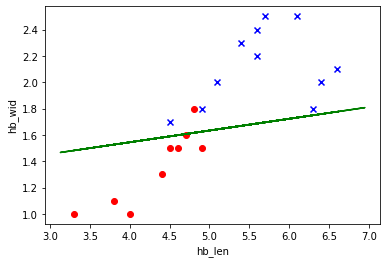

准确率： 0.95


In [17]:
if __name__=='__main__':
    cnt,best_w,best_c=Pocket()
    print("迭代次数：",cnt)
    print("超平面法向量：",best_w)
    print("阈值：",best_c)
    count = 0
    for i in range(len(test)):
        target = test[i][-1:]
        result = sign(np.sum(best_w*test[i][:-1])+best_c)
        if(target == result):
            count += 1
    accuracy = float(count/len(test))
    # 绘制测试集图像
    for i in range(len(test)):
        if test[i][-1] == -1:
            plt.scatter(test[i][0],test[i][1],c='r',marker='o')
        else:
            plt.scatter(test[i][0],test[i][1],c='b',marker='x')
#     for i in range(len(data)):
#         if data[i][-1] == -1:
#             plt.scatter(data[i][0],data[i][1],c='r')
#         else:
#             plt.scatter(data[i][0],data[i][1],c='b')
    X = np.random.uniform(3,7,50)
    Y = -(best_w[0]*X+best_c)/best_w[1]
    plt.plot(X,Y,'g')
    plt.xlabel('hb_len')
    plt.ylabel('hb_wid')
    plt.show()
    print("准确率：",accuracy)

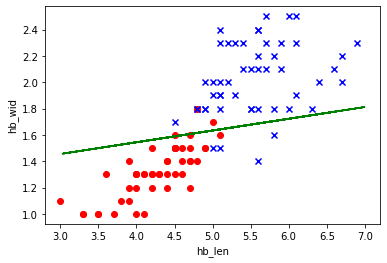

In [18]:
for i in range(len(Iris_1)):
    if Iris_1[i][-1] == -1:
        plt.scatter(Iris_1[i][0],Iris_1[i][1],c='r',marker='o')
    else:
        plt.scatter(Iris_1[i][0],Iris_1[i][1],c='b',marker='x')
X = np.random.uniform(3,7,50)
Y = -(best_w[0]*X+best_c)/best_w[1]
plt.xlabel('hb_len')
plt.ylabel('hb_wid')
plt.plot(X,Y,'g')
plt.show()

###  最后感谢做本次作业中给予我们组帮助的邹子涵、于天鹤同学。